After cleaning and thorough exploration of the data set, we can move to find new features. And drop some unwanted columns that are not useful.

In [96]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, calendar
from collections import defaultdict
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn import metrics

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# setup 
plotly.offline.init_notebook_mode(connected=True)
#sns.set_style(style="whitegrid")
sns.set_style('ticks')
sns.set_palette('bright')

# display charts inline
%matplotlib inline

# to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

### Load previously cleaned train data

In [10]:
%%time
# load previously cleaned data
train_df = pd.read_csv('../data/extra_cols_train.csv',index_col=0)

<string>:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: user 6.06 s, sys: 569 ms, total: 6.63 s
Wall time: 6.63 s


In [11]:
# X_train = pd.read_csv('../data/X_train.csv',index_col=0)
# X_test = pd.read_csv('../data/X_test.csv',index_col=0)
# y_train = pd.read_csv('../data/y_train.csv',index_col=0)
# y_test = pd.read_csv('../data/y_test.csv',index_col=0)

### What does the data look like?

In [12]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,revenue,year,month,day,weekday,hour,day_of_year
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,(not provided),organic,Unknown,google,0.0,2016,9,2,4,15,32
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,(not provided),organic,Unknown,google,0.0,2016,9,3,5,5,33
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,(not provided),organic,Unknown,google,0.0,2016,9,3,5,1,33
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,google + online,organic,Unknown,google,0.0,2016,9,3,5,5,33
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1,0,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,1,(not provided),organic,Unknown,google,0.0,2016,9,2,4,13,32


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899888 entries, 0 to 903652
Data columns (total 43 columns):
channelGrouping                                 899888 non-null object
date                                            899888 non-null int64
fullVisitorId                                   899888 non-null object
sessionId                                       899888 non-null object
visitId                                         899888 non-null int64
visitNumber                                     899888 non-null int64
visitStartTime                                  899888 non-null int64
device.browser                                  899888 non-null object
device.deviceCategory                           899888 non-null object
device.isMobile                                 899888 non-null bool
device.operatingSystem                          899888 non-null object
geoNetwork.city                                 899888 non-null object
geoNetwork.continent                       

In [14]:
features_train_df = train_df.copy()

In [15]:
# Let us remove columns that are not needed at all
cols_to_drop = []

# remove revenue because that was added just for better visualization purposes
cols_to_drop.append('revenue')

# id fields serve no purpose
cols_to_drop.append('fullVisitorId')
cols_to_drop.append('sessionId')
cols_to_drop.append('visitId')

# since we have data only for a year it is not useful
cols_to_drop.append('year')

# date is redundant because visitStartTime includes date
cols_to_drop.append('date')

# visitStartTime is broken into day, month etc. and exact time upto seconds doesn't make business sense
cols_to_drop.append('visitStartTime')

# continent is redundant becuase sub-continent is bit more granular but includes continent info
cols_to_drop.append('geoNetwork.continent')

# isMobile is redundant, device category already have that category
cols_to_drop.append('device.isMobile')

features_train_df.drop(cols_to_drop, axis=1, inplace=True)

In [16]:
checkpoint_1_df = features_train_df.copy()

In [17]:
features_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899888 entries, 0 to 903652
Data columns (total 34 columns):
channelGrouping                                 899888 non-null object
visitNumber                                     899888 non-null int64
device.browser                                  899888 non-null object
device.deviceCategory                           899888 non-null object
device.operatingSystem                          899888 non-null object
geoNetwork.city                                 899888 non-null object
geoNetwork.country                              899888 non-null object
geoNetwork.metro                                899888 non-null object
geoNetwork.networkDomain                        899888 non-null object
geoNetwork.region                               899888 non-null object
geoNetwork.subContinent                         899888 non-null object
totals.bounces                                  899888 non-null int64
totals.hits                            

In [18]:
# Handling the categorical data
# If some values of a categorical variable are less frequent than 5% than they all can be combined in one

In [19]:
all_cat_cols = list(features_train_df.select_dtypes(include='object').columns)
all_cat_cols

['channelGrouping',
 'device.browser',
 'device.deviceCategory',
 'device.operatingSystem',
 'geoNetwork.city',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'geoNetwork.subContinent',
 'trafficSource.adContent',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.campaign',
 'trafficSource.keyword',
 'trafficSource.medium',
 'trafficSource.referralPath',
 'trafficSource.source']

In [20]:
# reduces the levels for categorical variables
def reduce_category_levels(df, category_cols):
    ignored_cols = []
    for col in category_cols:
        unique_vals = df[col].nunique()
        print(col)
        print("number of unique values", unique_vals)
        if unique_vals > 100:
            print("Ignoring column", col, "\n")
            ignored_cols.append(col)
            continue
        val_percents = df[col].value_counts()*100/df.shape[0]
        dummy_val = ('dummy_'+str(col)).replace('.','_')
        print(dummy_val)
        for val_percent in val_percents.iteritems():
            #print(val_percent[0], val_percent[1])
            if val_percent[1] < 5:
                df[col].replace(val_percent[0],dummy_val, inplace=True)
        print("reduced number of unique values", df[col].nunique()) 
    return ignored_cols

In [21]:
ignored_cols = reduce_category_levels(features_train_df, all_cat_cols)

channelGrouping
number of unique values 8
dummy_channelGrouping
reduced number of unique values 5
device.browser
number of unique values 53
dummy_device_browser
reduced number of unique values 3
device.deviceCategory
number of unique values 3
dummy_device_deviceCategory
reduced number of unique values 3
device.operatingSystem
number of unique values 20
dummy_device_operatingSystem
reduced number of unique values 5
geoNetwork.city
number of unique values 649
Ignoring column geoNetwork.city 

geoNetwork.country
number of unique values 222
Ignoring column geoNetwork.country 

geoNetwork.metro
number of unique values 91
dummy_geoNetwork_metro
reduced number of unique values 4
geoNetwork.networkDomain
number of unique values 27996
Ignoring column geoNetwork.networkDomain 

geoNetwork.region
number of unique values 373
Ignoring column geoNetwork.region 

geoNetwork.subContinent
number of unique values 23
dummy_geoNetwork_subContinent
reduced number of unique values 8
trafficSource.adContent


In [22]:
ignored_cols

['geoNetwork.city',
 'geoNetwork.country',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.keyword',
 'trafficSource.referralPath',
 'trafficSource.source']

In [23]:
# let us drop the ignored columns for now
features_train_df.drop(ignored_cols, inplace=True, axis=1)

In [24]:
features_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899888 entries, 0 to 903652
Data columns (total 26 columns):
channelGrouping                                 899888 non-null object
visitNumber                                     899888 non-null int64
device.browser                                  899888 non-null object
device.deviceCategory                           899888 non-null object
device.operatingSystem                          899888 non-null object
geoNetwork.metro                                899888 non-null object
geoNetwork.subContinent                         899888 non-null object
totals.bounces                                  899888 non-null int64
totals.hits                                     899888 non-null int64
totals.newVisits                                899888 non-null int64
totals.pageviews                                899888 non-null int64
totals.transactionRevenue                       899888 non-null float64
trafficSource.adContent                  

In [25]:
checkpoint_2_df = features_train_df.copy()

In [26]:
# should do something about the month, day etc. those can be binned and then one hot encoded
# for month we can divided in 4 quarters
# day of month can be divided in start,mid,end
# weekday can be divided as weekday and weekend
# day of the year can be ignore for now
# hour can be ignore for now

# quarter
features_train_df['quarter'] = features_train_df['month'].apply(lambda x: 'quarter'+str(np.mod(x,4)))

In [27]:
# month star, mid, end
#features_train_df['month_period'] = features_train_df['weekday'].apply(lambda x: 'start' if x<6 else (if x>25 'mid' else 'end'))

In [28]:
features_train_df['week_day_end'] = features_train_df['weekday'].apply(lambda x: 'week_day' if x<5 else 'weekend')

In [29]:
# drop other date columns
features_train_df.drop(['month','day','weekday','hour','day_of_year'], axis=1, inplace=True)

In [30]:
features_train_df.shape

(899888, 23)

In [31]:
checkpoint_3_df = features_train_df.copy()

In [32]:
# one hot encode the categorical variables
# limit to categorical data using df.select_dtypes()
X_cat = features_train_df.select_dtypes(include=[object])
X_cat.columns

Index(['channelGrouping', 'device.browser', 'device.deviceCategory',
       'device.operatingSystem', 'geoNetwork.metro', 'geoNetwork.subContinent',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.medium', 'quarter', 'week_day_end'],
      dtype='object')

In [33]:
X_cat.shape

(899888, 13)

In [34]:
# create a LabelEncoder object and fit it to each feature in X

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X_cat.apply(le.fit_transform)
X_2.head()

,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.metro,geoNetwork.subContinent,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.medium,quarter,week_day_end
0,1,0,0,2,0,7,0,0,0,0,2,1,0
1,1,2,0,1,3,7,0,0,0,0,2,1,1
2,1,0,0,2,0,7,0,0,0,0,2,1,1
3,1,2,0,3,3,4,0,0,0,0,2,1,1
4,1,0,2,0,3,3,0,0,0,0,2,1,0


In [35]:
X_2.tail()

,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.metro,geoNetwork.subContinent,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.medium,quarter,week_day_end
903648,3,0,0,2,3,7,0,0,0,0,3,1,0
903649,3,0,2,0,3,5,0,0,0,0,3,1,0
903650,3,2,2,0,0,0,0,0,0,0,3,1,0
903651,3,0,0,2,3,4,0,0,0,0,3,1,0
903652,3,0,2,0,3,7,0,0,0,0,3,1,0


In [36]:
# create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
X_onehotlabels = enc.transform(X_2).toarray()
X_onehotlabels.shape

# as can be seen, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(899888, 46)

In [37]:
X_onehotlabels

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
enc.feature_indices_

array([ 0,  5,  8, 11, 16, 20, 28, 30, 32, 34, 36, 40, 44, 46])

In [39]:
X_1 = features_train_df.select_dtypes(exclude=[object])

In [40]:
X_1.tail()

,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.campaignCode,trafficSource.isTrueDirect
903648,1,0,17,1,15,0.0,1,0,1,0
903649,1,0,18,1,13,0.0,1,0,1,0
903650,1,0,24,1,21,0.0,1,0,1,0
903651,1,0,24,1,22,0.0,1,0,1,0
903652,1,0,31,1,31,0.0,1,0,1,0


In [41]:
X_1.shape, X_1.index

((899888, 10),
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             903643, 903644, 903645, 903646, 903647, 903648, 903649, 903650,
             903651, 903652],
            dtype='int64', length=899888))

In [42]:
# join the int and category columns
X = pd.concat([X_1,pd.DataFrame(X_onehotlabels,index=X_1.index)],axis=1)

In [43]:
X.shape

(899888, 56)

In [44]:
X.tail()

,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.campaignCode,trafficSource.isTrueDirect,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
903648,1,0,17,1,15,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
903649,1,0,18,1,13,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
903650,1,0,24,1,21,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
903651,1,0,24,1,22,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
903652,1,0,31,1,31,0.0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
# get train and test indices according to the dates
# last two months is test data

In [46]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,revenue,year,month,day,weekday,hour,day_of_year
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,(not provided),organic,Unknown,google,0.0,2016,9,2,4,15,32
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,(not provided),organic,Unknown,google,0.0,2016,9,3,5,5,33
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,(not provided),organic,Unknown,google,0.0,2016,9,3,5,1,33
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1,1,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,0,google + online,organic,Unknown,google,0.0,2016,9,3,5,5,33
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1,0,1,0.0,Others,Unknown,Unknown,1,0,Unknown,(not set),1,1,(not provided),organic,Unknown,google,0.0,2016,9,2,4,13,32


In [47]:
train_df['date'].min(), train_df['date'].max()

(20160801, 20170801)

In [48]:
train = train_df[train_df['date']<20170601].index

In [49]:
len(train)

762857

In [50]:
test = train_df[train_df['date']>=20170601].index

In [51]:
len(test)

137031

In [229]:
X_train = X.loc[train]

In [230]:
X_test = X.loc[test]

In [231]:
y_train = X_train['totals.transactionRevenue']
y_test = X_test['totals.transactionRevenue']

In [232]:
y_train = np.log1p(y_train.values)
y_test = np.log1p(y_test.values)

# or

# y_train = y_train/10**6
# y_test = y_test/10**6


In [233]:
y_train.shape, y_test.shape

((762857,), (137031,))

In [234]:
X_train.drop('totals.transactionRevenue', axis=1, inplace=True)
X_test.drop('totals.transactionRevenue', axis=1, inplace=True)

In [235]:
X_train.shape, X_test.shape

((762857, 55), (137031, 55))

In [236]:
X_train.describe()

,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.campaignCode,trafficSource.isTrueDirect,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
count,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000,762857.000000
mean,2.269909,0.498026,4.623192,0.782570,3.869259,0.978519,0.021671,0.999999,0.297811,0.156543,0.400387,0.111071,0.281690,0.050310,0.682262,0.205475,0.112264,0.750921,0.032221,0.216858,0.130589,0.290105,0.395883,0.073417,0.110005,0.227488,0.102022,0.105004,0.565486,0.050650,0.052691,0.420996,0.061072,0.094178,0.063914,0.065168,0.191331,0.990044,0.009956,0.978519,0.021481,0.978519,0.021481,0.960721,0.039279,0.156543,0.050310,0.400387,0.392760,0.289238,0.262142,0.208312,0.240308,0.782518,0.217482
std,9.423863,0.499996,9.829248,0.412498,7.163345,0.144982,0.148866,0.001145,0.457296,0.363370,0.489977,0.314220,0.449823,0.218583,0.465597,0.404049,0.315691,0.432480,0.176587,0.412106,0.336951,0.453811,0.489040,0.260821,0.312896,0.419211,0.302677,0.306559,0.495693,0.219283,0.223417,0.493719,0.239462,0.292076,0.244599,0.246823,0.393349,0.099282,0.099282,0.144982,0.144982,0.144982,0.144982,0.194257,0.194257,0.363370,0.218583,0.489977,0.488365,0.453409,0.439800,0.406101,0.427271,0.412534,0.412534
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,4.000000,1.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00

In [60]:
# save it temporarily
# X_train.to_csv("../data/X_train.csv")

In [61]:
# X_test.to_csv("../data/X_test.csv")
# y_train.to_csv("../data/y_train.csv")
# y_test.to_csv("../data/y_test.csv")

In [62]:
# Start with Linear Regression

In [63]:
reg = LinearRegression(normalize=True)

In [64]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [65]:
reg.score(X_test,y_test)

0.02820290930225211

In [66]:
#svr = SVR()

In [67]:
#svr.fit(X_train,y_train)

In [237]:
import lightgbm as lgb

In [238]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((762857, 55), (762857,), (137031, 55), (137031,))

In [239]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    #pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    #return pred_test_y, model, pred_val_y
    return model, pred_val_y

# Training the model #
model, pred_val = run_lgb(X_train, y_train, X_test, y_test)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.73108
[200]	valid_0's rmse: 1.72966
[300]	valid_0's rmse: 1.72921
Early stopping, best iteration is:
[224]	valid_0's rmse: 1.72835


In [240]:
X_train.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            903643, 903644, 903645, 903646, 903647, 903648, 903649, 903650,
            903651, 903652],
           dtype='int64', length=762857)

In [241]:
features_train_df.columns

Index(['channelGrouping', 'visitNumber', 'device.browser',
       'device.deviceCategory', 'device.operatingSystem', 'geoNetwork.metro',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.medium', 'quarter', 'week_day_end'],
      dtype='object')

In [242]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source', 'revenue',

In [243]:
results_df = train_df[['fullVisitorId','totals.transactionRevenue']]

In [244]:
results_df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            903643, 903644, 903645, 903646, 903647, 903648, 903649, 903650,
            903651, 903652],
           dtype='int64', length=899888)

In [245]:
results_df = results_df.loc[X_test.index]

In [246]:
results_df.shape

(137031, 2)

In [247]:
pred_val[pred_val<0] = 0

In [248]:
results_df['predicted_revenue'] = [np.expm1(rev) for rev in pred_val]

#or

#results_df['predicted_revenue'] = pred_val

# or

# results_df['predicted_revenue'] = pred_val*10**6

In [249]:
results_df.head()

,fullVisitorId,totals.transactionRevenue,predicted_revenue
4822,6136444193474843946,0.0,0.008828
4823,9499266297099251015,0.0,0.005706
4824,965275377736384905,0.0,0.002359
4825,4609130972135924274,0.0,0.005478
4826,7154533339220730030,0.0,0.000000


In [250]:
results_df = results_df.groupby("fullVisitorId")["totals.transactionRevenue", "predicted_revenue"].sum().reset_index()

In [251]:
results_df[results_df['totals.transactionRevenue'] > 0].sort_values(['totals.transactionRevenue'],ascending=False)

,fullVisitorId,totals.transactionRevenue,predicted_revenue
98837,9417857471295131045,1.517012e+10,18639.436566
2533,79204932396995037,7.047150e+09,123.309386
29550,1957458976293878100,6.709380e+09,361.549507
95099,9026840718082010040,6.423130e+09,2708.723675
54229,4604965471651937146,4.280700e+09,205.634250
...,...,...,...
80614,7447137895250670218,1.500000e+06,169.509682
59797,5201418842615044194,1.500000e+06,0.938159
110612,9213584705844626996,1.200000e+06,1209.862909
96898,9213584705844626996,1.200000e+06,986.059753


In [252]:
print(np.sqrt(metrics.mean_squared_error(np.log1p(\
        results_df["totals.transactionRevenue"].values), np.log1p(results_df["predicted_revenue"].values))))

1.772027270101044


In [253]:
# optional
print(np.sqrt(metrics.mean_squared_error(\
        results_df["totals.transactionRevenue"].values, results_df["predicted_revenue"].values)))

68804136.09563807


In [220]:
# test out if we predict 0 revenue ....just for testing purposes
results_df["zero_predicted"] = 0

In [221]:
print(np.sqrt(metrics.mean_squared_error(np.log1p(\
        results_df["totals.transactionRevenue"].values), np.log1p(results_df["zero_predicted"].values))))

2.2866025325494768


In [128]:
diff = np.sort(np.absolute(results_df['totals.transactionRevenue']-results_df['predicted_revenue']))

In [133]:
diff = [item for item in diff if item >10000]

In [134]:
diff[0:100]

[10145.95901487352,
 10492.241273696918,
 10789.311338447214,
 10809.200399765105,
 11275.17109085696,
 11907.683808540001,
 12138.337954264238,
 12618.1092969525,
 12632.65956089393,
 12707.767317732132,
 13187.154276043471,
 13220.76216484214,
 13368.564256560865,
 13763.967577104515,
 13989.016448306855,
 14094.273096841047,
 14530.58616823345,
 14950.503486121806,
 15320.571225399266,
 15763.780908400024,
 16270.202577017697,
 16440.727540099993,
 16954.78307743075,
 16976.83103853912,
 17743.81631171659,
 18264.520331875367,
 18522.973332736252,
 18617.891535082195,
 18876.626878223993,
 19910.029870966064,
 20599.01399023779,
 20921.2649628051,
 21160.771892415134,
 21766.436565517746,
 22223.113159190765,
 22334.997182972158,
 22977.744397418817,
 23087.80950516683,
 23655.59439614082,
 23682.61206573189,
 24173.959005713303,
 24613.067226753243,
 24862.01693674613,
 25061.17479913103,
 25328.286028307008,
 26671.11781994119,
 26695.92445142139,
 26825.18735211777,
 32625.750178

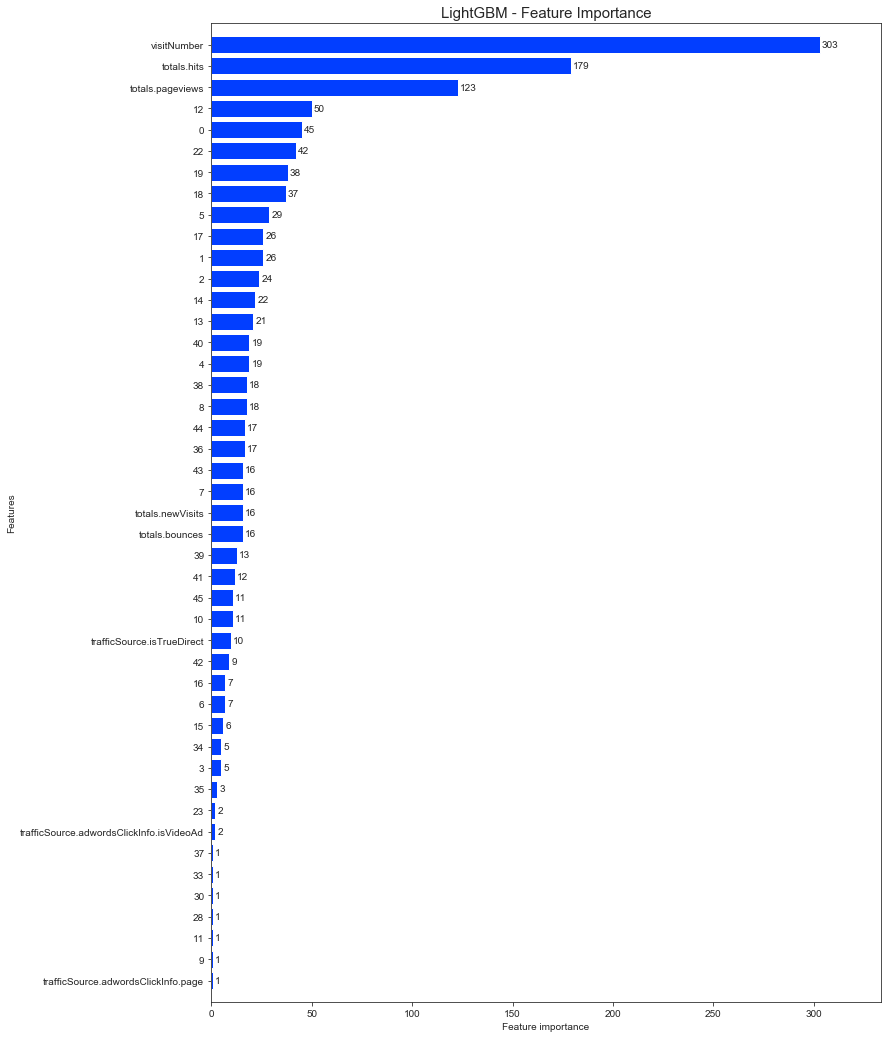

In [222]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

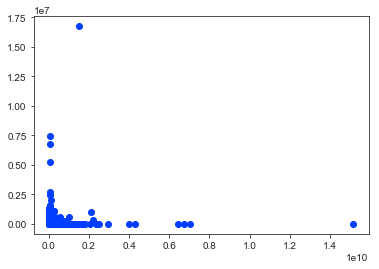

In [254]:
plt.scatter(results_df['totals.transactionRevenue'], results_df['predicted_revenue'])

In [224]:
np.log1p(results_df['totals.transactionRevenue']).describe()

count    111119.000000
mean          0.293390
std           2.267712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.442594
Name: totals.transactionRevenue, dtype: float64